# Comparación de los rendimientos de modelos predictivos de toxicidad después de la radioterapia para el cáncer de mama utilizando diferentes enfoques de aprendizaje automático.

### 1. Introducción  
Hasta la fecha, el uso de modelos de inteligencia artificial (IA) y aprendizaje automático (AA) en el campo médico está aumentando gracias a su capacidad de aprender a partir de datos de entrenamiento sin ser programados explícitamente. Por esta razón, estas técnicas se están considerando cada vez más en el campo de la terapia contra el cáncer, avanzando hacia una era de “oncología de precisión” [1,2]. Los temas abarcan desde la imagenología médica [3], el descubrimiento personalizado de medicamentos [4], el autodelineado de objetivos y el cálculo de la distribución de dosis [5], hasta la predicción de resultados y toxicidad, que es el enfoque del presente trabajo.  

En particular, en el campo del cáncer de mama, se ha demostrado que la mayoría de los pacientes [6,7] reducen la recurrencia local [8] y la mortalidad general [6,7,9]. Sin embargo, la radioterapia para el cáncer de mama tiene varios efectos secundarios, tanto agudos como tardíos [10-13]. La toxicidad temprana incluye eritema mamario y descamación que ocurre dentro de los 90 días posteriores al tratamiento y generalmente se recupera con el tiempo. La toxicidad tardía (por ejemplo, telangiectasia, fibrosis e hiperpigmentación de la piel) puede, por el contrario, volverse irreversible y progresiva con el tiempo.  

Desarrollar modelos de predicción precisos para los efectos secundarios relacionados con la radioterapia (por ejemplo, la toxicidad) es crucial para minimizar su impacto [14]. Esto permitiría a los médicos ofrecer tratamientos más personalizados al identificar los principales factores que influyen en la toxicidad e incorporarlos en la decisión y optimización de la terapia. Aunque las toxicidades tardías graves después de la radioterapia adyuvante para el cáncer de mama son relativamente raras [6,7,11], el número de pacientes tratados en países de ingresos altos es enorme y aumenta anualmente en aproximadamente un 4% [15], lo que impulsa a los investigadores a dedicar mucha energía a predecirlas y, posiblemente, prevenirlas. Además, se ha informado una asociación entre la intensidad de los efectos agudos transitorios y la aparición de toxicidad tardía [16], lo que mantiene un alto interés también en los modelos predictivos de toxicidad temprana.  

Las técnicas de AA se utilizan ampliamente para hacer predicciones sobre nuevos datos, pero requieren un conjunto de datos lo suficientemente grande y diverso para ser entrenadas. Esta es una de las razones por las cuales la aplicación clínica sigue siendo limitada, junto con la falta de interpretabilidad de los modelos [17,18]. A pesar de esto, en los últimos años han surgido varios intentos de utilizar AA en el desarrollo de modelos predictivos de toxicidad en radioterapia [17], incluido el caso del cáncer de mama [19-21]. El AA tiene el potencial de mejorar las capacidades de predicción, siempre que se disponga de suficientes datos de pacientes. Sin embargo, faltan en gran medida estudios que comparen los rendimientos de los métodos de AA en la predicción de la toxicidad inducida por la radiación, tratando de evaluar el mejor enfoque [17]. En particular, el problema de la interpretabilidad sigue siendo relevante al intentar encontrar el "mejor" enfoque: los métodos avanzados de AA/aprendizaje profundo (DL) a menudo resultan en modelos de "caja negra" y/o tienden a incluir un gran conjunto de variables de baja relevancia clínica, lo que oscurece el panorama para los médicos [18].  

Las métricas típicamente utilizadas para evaluar el rendimiento del clasificador en pacientes con alto riesgo de toxicidad, como el área bajo la curva del sistema operativo del receptor (ROC) llamada AUC, pueden ser significativamente engañosas para datos fuertemente desbalanceados. Por lo tanto, también se deben considerar métricas como la F1 y la precisión equilibrada. Establecer una estrategia común de preprocesamiento que involucre escalado, codificación y limpieza de características es crucial para comparar los rendimientos de los modelos.  

Hasta donde sabemos, pocos estudios que comparan diferentes enfoques de modelado se han realizado sobre la toxicidad mamaria. Siempre son sobre poblaciones de tamaño limitado y/o consideran solo algunos enfoques de AA [22-25]. En particular, estos estudios se realizaron sobre diferentes resultados (toxicidad aguda [22,25], descamación aguda [23], dermatitis inducida por radiación [24]). Las variables de entrada utilizadas son diversas, abarcando desde variables espectrofotométricas [25], características iniciales, comorbilidades [23] y variables clínicas [22] hasta características de radiomics [24]. Algunos estudios consideraron cohortes pequeñas [24,25] o grandes [22,23]. Sus rendimientos varían según las características utilizadas. En este sentido, nuestro trabajo es mejor comparable con el de Rattay et al. [22]. La disponibilidad de una gran cohorte de pacientes de una sola institución, tratados de manera homogénea con irradiación de mama completa utilizando campos tangenciales con el mismo esquema de fraccionamiento y siguiendo procedimientos similares de contorno y planificación, permitió explorar el problema. La tasa de eventos nos llevó a enfocarnos en la toxicidad temprana, considerando que el número de pacientes/eventos era lo suficientemente grande para aplicar con éxito muchos métodos de AA. Ref. [25] muestra una gran mejora en el rendimiento gracias a las otras variables consideradas.  

### 2. Materiales y Métodos  
Este estudio utilizó una gran cohorte de una sola institución (n = 1325) de pacientes con cáncer de mama tratadas de manera homogénea con campos tangenciales. Los datos de los pacientes se analizaron en el marco de un estudio retrospectivo aprobado por el Comité Ético Institucional (registrado en ClinicalTrials.gov, Número de Identificación: NCT03077191). En cuanto a los detalles de la muestra, es posible referirse a artículos publicados previamente [26,27]. Un total de 11 pacientes fueron excluidos, ya sea porque recibieron un refuerzo o porque fueron tratadas con la técnica VMAT.  

Este estudio involucró una cohorte de una sola institución, lo que ofrece la ventaja de mayor homogeneidad, tipología similar de pacientes y un gran número de casos, pero con la desventaja de no tener una validación externa como en los estudios multiinstitucionales. Todos los procedimientos descritos se implementaron en Python versión 3.7.9 junto con Microsoft SQL Server v15.0 a través de SQL Server Management Studio versión 18.11.1. El preprocesamiento y el análisis de modelado se realizaron utilizando un código interno (medicalAI en mAItre (Medical Artificial Intelligence Toolkit for REsearch, https://github.com/pymaitre, consultado el 16 de enero de 2024)).  

#### 2.1. Características de los Pacientes, Definición del Objetivo y Variables Disponibles  
Todos los pacientes considerados se sometieron a una cirugía conservadora de mama para la enfermedad pTis-pT3 pNxpN1a M0 en el período comprendido entre 02/2009 y 05/2017. La radioterapia se administró con WB-IMRT a una dosis total de 40 Gy en 15 fracciones, sin refuerzo. La mayoría de los pacientes presentaron carcinoma ductal invasivo (n = 961, 72.5%), mientras que n = 116 (8.8%) pacientes mostraron carcinoma lobulillar invasivo. Hubo 194 pacientes con estadio pT mayor a uno (14.6%). Además, los pacientes recibieron quimioterapia (n = 371, 28%) y anticuerpos monoclonales (n = 109, 8.2%). Los detalles de las características de los pacientes y del tratamiento se informan en las Tablas 1-3 y en los trabajos de Fodor et al. [26,27].

*Tabla 1.* Once variables dicotómicas seleccionadas con varianza intracaracterística > 0.02 y con un valor $p$ en la regresión logística univariada LR< 0.8. NA significa no acorde.

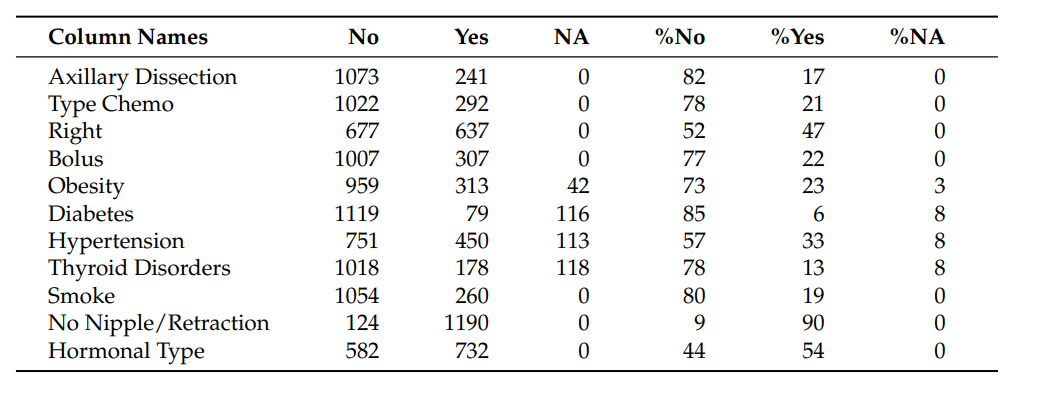

*Tabla 2*. La variable categórica seleccionada con varianza intracaracterística > 0.02 y con un valor p en la regresión logística univariada < 0.8. NA significa no acorde, equivalente a mama derecha para esta tabla. Con * se muestran las categorías más predictivas (valor p en la regresión logística univariada < 0.2).

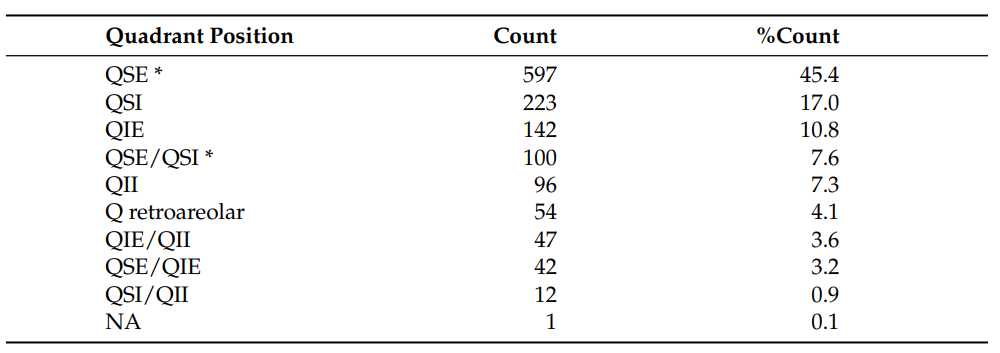

*Tabla 3*. Siete variables continuas seleccionadas con varianza intracaracterística > 0.02 y con un valor p en la regresión logística univariada < 0.8. NA significa no acorde. Se evitaron los valores NA en las variables continuas al derivar las otras columnas.

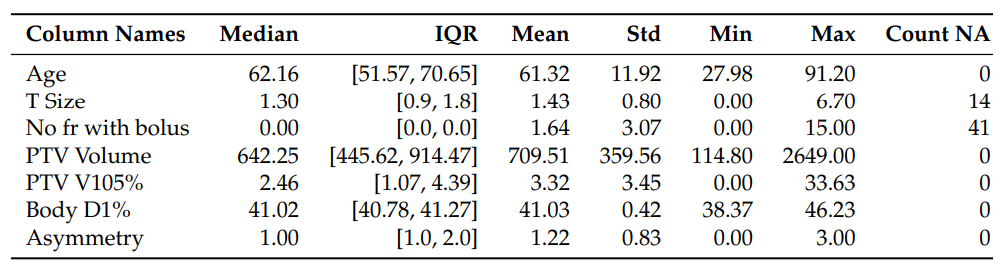

El objetivo fue la toxicidad aguda G2/G3 según el RTOG (Radiation Therapy Oncology Group), lo que resultó en 204 pacientes con el evento y 1110 sin el evento, respectivamente. El conjunto de datos, que incluye 25 características clínicas, anatómicas y dosimétricas, se dividió en 984 pacientes para el entrenamiento y 330 para una prueba interna independiente. Las variables consideradas para este estudio fueron: "Edad", "Disección Axilar", "Posición del Cuadrante", "Tamaño del Tumor", "Quimioterapia", "Tipo de Quimioterapia", "AB Monoclonal", "Terapia Hormonal", "Radioterapia Bilateral", "Derecha", "Número de Fracciones (fr) con Bolo", "Bolo", "Volumen PTV", "PTV V105%" (es decir, el volumen del PTV que recibe más del 105% de la dosis prescrita), "Cuerpo D1%" (es decir, la dosis recibida por el 1% del volumen corporal), "Obesidad", "Diabetes", "Hipertensión", "Trastornos de Tiroides", "Fumar", "Alcohol", "Asimetría", "Cosmesis General", "Sin Pezón/Retracción", y "Tipo de Terapia Hormonal". En las Tablas 1-3 se muestran las características de la cohorte según las características consideradas, excepto algunos parámetros con baja varianza y un valor p alto en la regresión logística univariada, como se explica más adelante.

#### 2.2. Preprocesamiento de Datos  
Primero, el conjunto de datos de entrenamiento se estandarizó utilizando el método de escalado robusto [28] (ver detalles en la Tabla A2), limitando el impacto de valores atípicos. El conjunto de datos de prueba se escaló en consecuencia. Se aplicó un codificador *one-hot* a las características categóricas (es decir, "posición del cuadrante"; ver Tablas 1–3), y se seleccionaron solo las categorías más predictivas para este resultado específico, de un total de nueve, con un valor p bajo en la regresión logística univariada (global < 0.2): "QSE/QSI" y "QSE", es decir, QSE y QSI corresponden al cuadrante superior externo e interno, respectivamente. Esta elección fue aprobada por el médico de referencia. Además, se excluyeron las variables con baja varianza intracaracterística y un valor p alto en la regresión logística univariada [29]. Las características con una varianza intracaracterística demasiado baja (<0.02) no pueden ser predictivas para el modelo y pueden confundir un modelo multivariado. Primero, se aplicó preliminarmente un umbral de valor p alto (global > 0.8) para omitir características que seguramente no están asociadas con el objetivo. Como resultado, se eliminaron “Radioterapia Bilateral”, “Alcohol”, “Terapia Hormonal”, “Cosmesis General”, “Quimioterapia” y “AB monoclonal”. Luego, se calculó la correlación de Spearman en las 20 características restantes (ver Figura 1), y se eliminaron las características con un valor absoluto de |ρ| de Spearman mayor a 0.8, como es el caso de "Bolo", tal como se observa en la Figura 1. Entre las características correlacionadas, se eligió la que tenía un valor p más bajo en la regresión logística univariada [30]. En el Apéndice A (Tabla A4) se presenta un resumen de cómo se seleccionaron las características.  

La técnica de sobremuestreo sintético de minorías (SMOTE, ver detalles en la Tabla A2) se aplicó para crear datos sintéticos de la minoría y compensar el desequilibrio de clases. La proporción entre los números de muestras minoritarias y mayoritarias se fijó en 0.5. Esto resultó en un porcentaje de clases con/sin el evento de 32% y 68%, respectivamente. Para mayor exhaustividad, se ejecutaron modelos con una proporción de 1:1, obteniendo mejores resultados para algunos modelos y peores para otros. Así, se decidió mantener un enfoque más conservador, añadiendo menos datos sintéticos. Cabe destacar que SMOTE no se utilizó para los modelos LightGBM y AutoGluon debido a su enfoque intrínsecamente equilibrado.

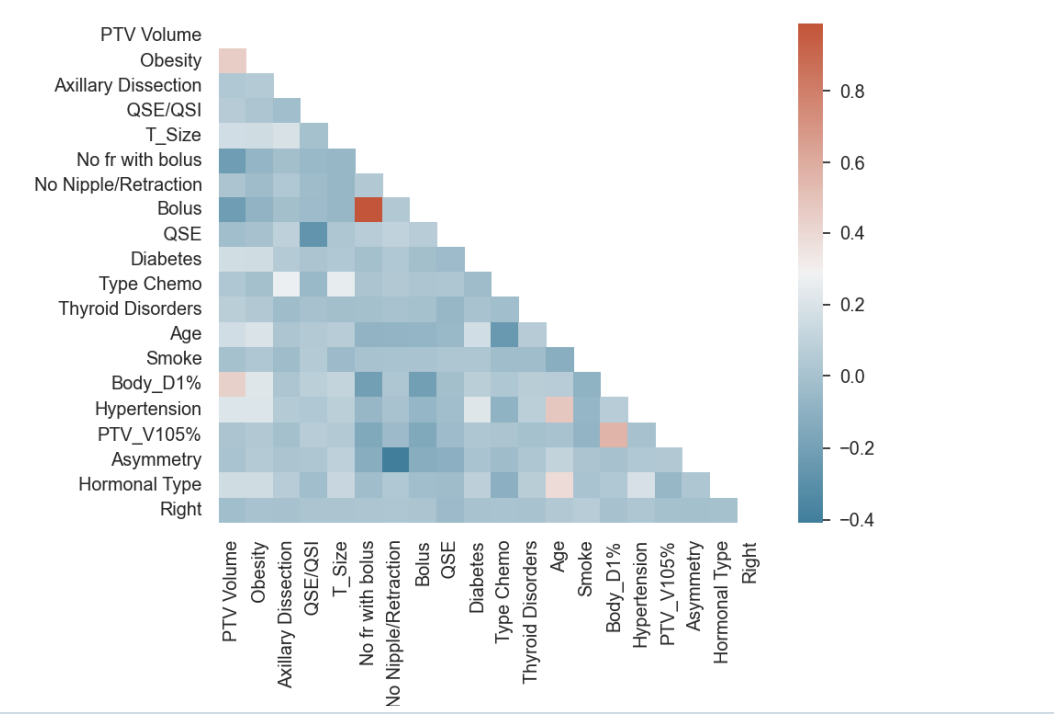

*Figura 1*. Matriz de correlación de Spearman sobre las 20 características obtenidas después del preprocesamiento. El orden de las características disminuye según su valor p en la regresión logística univariada. La barra de color muestra el factor de correlación de Spearman ρ.

#### 2.3. Métodos Estadísticos y de Aprendizaje Automático  
Se consideraron varios métodos de aprendizaje automático (enumerados en la Tabla 4 con sus acrónimos): LR, Lasso, ElasticNet, KNN, SVM, GNB, MLP, RF, LightGBM y AutoGluon. Lasso y ElasticNet forman parte de la misma tipología de modelos (es decir, regresión logística). La diferencia radica solo en la penalización elegida, que es un tipo de regularización utilizada para reducir el sobreajuste y mejorar la interpretabilidad. ElasticNet, en particular, es una combinación de los otros dos [31]. KNN es un clasificador no paramétrico que utiliza métodos de proximidad para distinguir entre clases [32]. SVM es un algoritmo que clasifica mediante la elección de un hiperplano en un espacio N-dimensional [33,34]. GNB es parte de los llamados clasificadores probabilísticos y se basa en el teorema de Bayes, con la suposición de independencia fuerte entre las características de entrada y una distribución normal para cada clase [35]. MLP es una red neuronal artificial *feedforward* (ANN) con múltiples capas, donde el mapeo entre las capas de entrada y salida se realiza mediante una función de activación no lineal [36]. RF [37] y LightGBM [38] son ambos algoritmos que combinan múltiples árboles de decisión para llegar a un resultado final (los árboles de decisión se construyen mediante una serie de nodos para dividir los datos), donde el segundo suele ser más preciso que el primero. RF los construye de manera independiente, mientras que LightGBM, un algoritmo basado en *gradient boosting*, los construye uno tras otro. Esto significa que las instancias de datos con grandes gradientes se mantienen, mientras que las de gradientes pequeños se descartan aleatoriamente. Finalmente, AutoGluon es un código de AutoML que opera en aprendizaje supervisado, típicamente utilizado para predicciones tabulares. Se enfoca en el *stack ensembling* automatizado, que consiste en combinar un conjunto de clasificadores entrenados individualmente para reducir su error intrínseco. Aquí se usa como comparación con los otros códigos considerados [39]. Los modelos mencionados anteriormente se eligieron debido a su uso típico en aprendizaje automático con respecto a problemas de clasificación (por ejemplo, [17,40]). AutoGluon y LightGBM son menos citados en la literatura anterior, considerando su implementación reciente como un desarrollo futuro de modelos previos.

*Tabla 4*. Descripción de los modelos con acrónimos y artículo de referencia. Los enlaces a la implementación del modelo utilizada se encuentran en la Tabla A2. * Modelo típicamente utilizado.

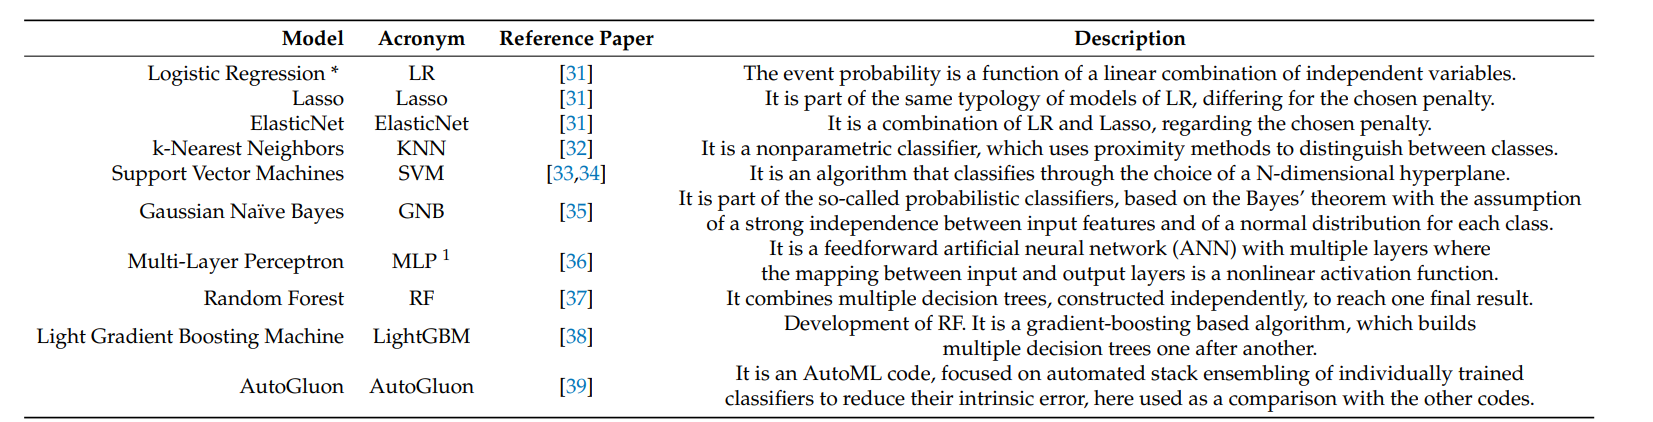

$^{1}$ Cabe señalar que la versión de MLP utilizada aquí es una versión simplificada de sklearn, y por lo tanto, no ofrece todas las potencialidades de una más compleja (que utiliza TensorFlow), las cuales se investigarán en trabajos futuros.


Todos los modelos, excepto AutoGluon y LightGBM, se ejecutaron aplicando una búsqueda bayesiana (ver Tabla A2 para detalles) para maximizar la métrica elegida (la mejor entre precisión balanceada, f1 ponderado, f1 macro y AUC; ver metricsfs en la Tabla 5) en una muestra de validación cruzada estratificada k-fold (ver Tabla A2 para detalles). Esto significa que el conjunto de entrenamiento se divide en k = 5 conjuntos de datos, manteniendo fijo el ratio entre cada clase de pacientes. El modelo se entrena utilizando k-1 pliegues y se valida en el que queda fuera. Los resultados obtenidos en los k conjuntos de validación, variando los parámetros, se combinaron promediando la puntuación definida para elegir los hiperparámetros que maximizan la puntuación para cada modelo, descrito en el Apéndice A (Tabla A1). Además, se aplicó una selección de características hacia atrás secuencial flotante (SBFS, ver Tabla A2 para detalles), a partir de la cual se eligió un número parsimónico de características. Esto significa que la métrica elegida (ver metricmod opt en la Tabla 5) debe estar dentro del mínimo entre el 1% del valor máximo de la métrica y su error estándar. El número de características se considera, de hecho, como uno de los parámetros libres del modelo que se optimiza, por lo que los modelos pueden terminar con un número diferente de características. Para cada modelo, se derivó la importancia de las características junto con la puntuación de métricas complementarias tanto para los conjuntos de datos de entrenamiento como de prueba. Un enfoque más completo para abordar la explicabilidad sería utilizar un explicador global agnóstico (por ejemplo, SHAP [41] o LIME [42]); sin embargo, este no fue el objetivo principal del trabajo actual y se abordará en un artículo posterior. Para cada métrica, se ejecutó todo el proceso y se eligió la métrica con menos discrepancia en AUC entre el entrenamiento y la prueba interna. La métrica elegida en metricsfs es, de hecho, un parámetro libre para este estudio. Esto se explica mejor en el Apéndice A (Tabla A3).

Además, se aplicó LR utilizando dos enfoques diferentes: el primero sigue el mismo proceso descrito anteriormente, mientras que el segundo sigue un enfoque similar al descrito en [43–45]. Si bien ambos procedimientos siguieron el mismo preprocesamiento, como se describe en la Sección 2.2, se utilizó una estrategia diferente para el selector de características del segundo procedimiento. En particular, se computó una LR multivariada con un número fijo de tres o cuatro variables elegidas entre todas las combinaciones de características seleccionadas tras calcular su correlación. Esto se realizó para cada combinación aplicando *bootstrapping* (1000 muestreos aleatorios con reemplazo) en paralelo para seleccionar la combinación con mejor rendimiento. 

Se siguió un enfoque diferente con respecto a AutoGluon y LightGBM. Considerando que se proporcionan con aumento de datos y selección de características, no se dieron datos aumentados por SMOTE a estos modelos. Si bien AutoGluon también proporciona optimización de hiperparámetros en su propio código, esto no es posible con LightGBM, y por lo tanto, se utilizó una herramienta más compleja llamada “optuna” [46] (ver Tabla A2 para detalles). Los mejores parámetros elegidos para todos estos modelos se describen en el Apéndice A (Tabla A1).

*Tabla 5*. Umbral de Youden derivado para los datos de entrenamiento/prueba, número de características parsimónicas seleccionadas, métricas utilizadas para SBFS (metricsfs) y optimización de hiperparámetros del modelo (metricmod opt). El valor del umbral de Youden de entrenamiento presentado aquí se utilizó para la matriz de confusión, mientras que el de los gráficos ROC se deriva como el promedio de la computación bootstrap (para KNN, el umbral de entrenamiento se derivó añadiendo un ϵ = 0.01).

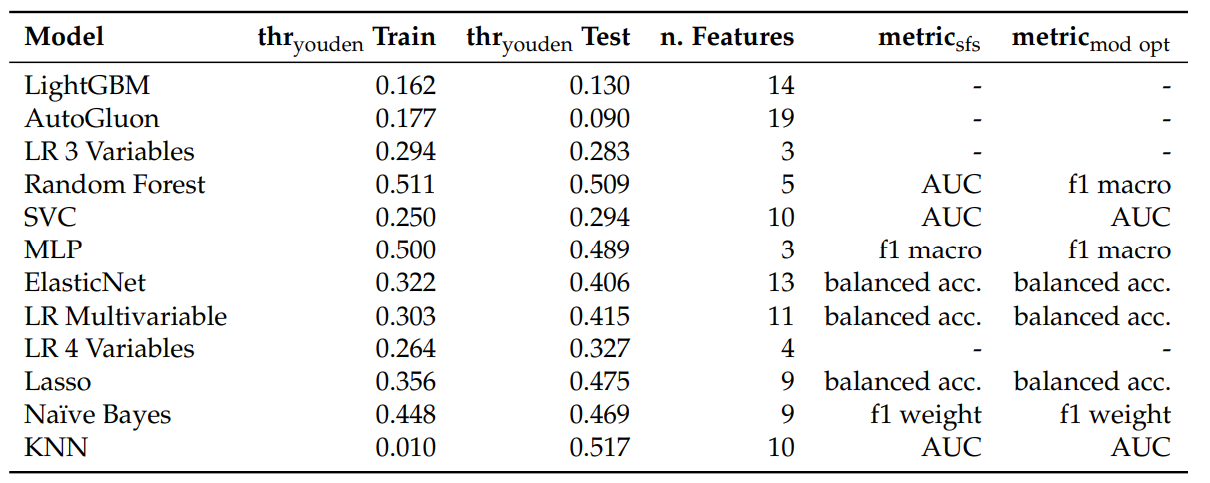

### 2.4. Métricas para Comparar Métodos de Aprendizaje Automático

Se utilizaron diferentes métricas para comparar los modelos de aprendizaje automático considerados en términos de rendimiento. Para el primer tipo de procedimiento previamente descrito, además del conocido AUC, las métricas utilizadas son F1, separadamente en pacientes con/sin el evento; puntuación de Brier; y pendiente/R² del gráfico de calibración. La precisión balanceada también se utilizó para la optimización del modelo y SBFS.

La puntuación F1 puede considerarse como una media armónica de las métricas de precisión y recuperación. El mejor valor es uno, y el peor es cero (Ecuación (1)).
$$
F1 = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} \quad (1)
$$

La precisión (o valor predictivo positivo) y la recuperación (o sensibilidad) se definen de la siguiente manera (Ecuación (2)):
$$
Precision = \frac{TP}{TP+FP},\text{ } Recall = \text{Sensitivity} = \frac{TP}{TP+FN}\quad (2)

$$


En particular, el F1 puede calcularse para cada clase por separado y luego combinarse de diferentes maneras, lo que da resultados diferentes si el conjunto de datos está desbalanceado: micro F1, macro F1 y F1 ponderado. El primero se llama tradicionalmente precisión, el segundo es la media aritmética de las clases F1, y el tercero es el promedio ponderado de las clases F1 considerando la numeración de cada clase.
La métrica conocida, AUC, se calcula como el área bajo la curva de sensibilidad (Ecuación (2)) frente a 1-especificidad, definida como (Ecuación (3)):

$$
\text{Specificity} = \frac{TN}{FP + TN } \quad(3)
$$

A partir de las mismas dos métricas, la precisión balanceada se puede definir como el promedio de la recuperación obtenida en cada clase, como se muestra en la Ecuación (4):
$$
Precisión Balanceada = \frac{(especificidad + recuperación)}{2} \quad(4)
$$

Tanto el F1 como la precisión balanceada se utilizan típicamente en casos de clasificación desbalanceada como este, con la diferencia de que el F1 funciona mejor cuando la atención debe centrarse en los positivos, mientras que para la precisión balanceada, los negativos y positivos tienen la misma importancia.

El puntaje de Brier (Ecuación (5)) es el error cuadrático medio calculado entre las probabilidades predichas (ft) y los valores observados (ot), y siempre se encuentra entre 0 y 1. El mejor modelo debe minimizar el valor del puntaje de Brier.
$$
BS = \frac{1}{N}\sum_{t=1}^{N}(f_t - o_t)^2 \quad(5)
$$

Para el segundo procedimiento aplicado en LR con bootstrap, en cambio, se consideró que un modelo era bueno cuando el valor p global e intervariable del LR multivariado se encontraba por debajo de 0.05. Solo se conservaron los modelos con la mejor frecuencia de bootstrap. Además, los restantes se ordenaron para maximizar aquellos con mejor promedio de AUC entre los datos de entrenamiento y prueba, y de ellos, se tomó el mejor como el modelo óptimo. 

Finalmente, en ambos procedimientos, se utilizó la maximización de la métrica Youden J (Ecuación (6)) junto con la ROC para definir el umbral utilizado para discriminar entre las dos clases.

$$
J = sensitivity + specificity − 1 \quad(6)
$$

### 3. Resultados

#### 3.1. Rendimiento de los Modelos

Un resumen del rendimiento general de los modelos se muestra en las Tablas 5 y 6 y en la Figura 2, donde se comparan diferentes métricas en el conjunto de datos de entrenamiento-prueba en el eje x. Las mejores configuraciones elegidas para los modelos se describen en la Tabla A1. Los modelos se trazan en orden ascendente, comenzando desde el que tiene menor discrepancia entre el entrenamiento y la prueba. LightGBM fue el mejor modelo en términos de valor absoluto de la métrica y discrepancia entre los conjuntos de entrenamiento y prueba. Buenas actuaciones también fueron ofrecidas por AutoGluon, RF, SVC y MLP. ElasticNet y LR, que se utilizan con mayor frecuencia en la literatura, no mostraron un rendimiento significativamente diferente (como se muestra también en los gráficos ROC de la Figura 3). En cambio, KNN estuvo fuertemente sobreajustado. Posiblemente, esto se relaciona con el hecho de que es un clasificador no paramétrico, que utiliza métodos de proximidad para distinguir entre clases. La muestra está desbalanceada y no es trivial definir un valor correcto para los hiperparámetros (por ejemplo, número de vecinos). Además, este modelo trabaja con grupos de datos y, por lo tanto, tiende a ajustarse mejor a los datos de entrenamiento (olvidando la prueba) si no encuentra grupos de discriminación fuertes.

El AUC de los datos de prueba está ligeramente por encima de 0.6 en general. El puntaje F1 en pacientes con toxicidad está alrededor de 0.3, mientras que depende del modelo para pacientes sin toxicidad (en su mayoría por encima de 0.7). Se derivó un gráfico de calibración para cada modelo, del cual se extrajeron la pendiente, $ R^2 $ y el puntaje Brier. AutoGluon y LightGBM mostraron el mejor puntaje Brier, mientras que MLP, RF y GNB mostraron los peores valores en el conjunto de prueba. Las pendientes de entrenamiento y prueba de ElasticNet y LightGBM tienen valores similares, aunque los valores de ElasticNet son más bajos de lo esperado, mientras que los de LightGBM son más altos. Esto puede deberse a la distribución de probabilidad derivada (ver Apéndice A, Figura A2 para los gráficos de calibración). Sin embargo, considerando la pendiente similar entre los conjuntos de entrenamiento y prueba, podría recalibrarse fácilmente. LR, en cambio, por ejemplo, aunque su pendiente de entrenamiento está cerca de uno, es más difícil de analizar considerando la gran discrepancia con la pendiente del conjunto de prueba, lo que podría crear dificultades en la recalibración. Las pendientes de RF fueron muy discrepantes si consideramos los datos de entrenamiento aumentados. Sin embargo, la pendiente de entrenamiento se vuelve similar a la del conjunto de prueba (ver Apéndice A, Figura A1) si se aplica el mismo modelo considerando los datos de entrenamiento originales. MLP resultó en la peor diferencia entre las pendientes de entrenamiento y prueba, tanto considerando el conjunto de entrenamiento original como el aumentado por SMOTE. Finalmente, respecto a $ R^2 $, RF y LightGBM mostraron los valores menos discrepantes, más cercanos a uno, mientras que LR fue el más discrepante, con un valor de prueba más cercano a cero. Los umbrales de Youden mostrados en la Tabla 5 se derivaron por separado para los conjuntos de entrenamiento y prueba a partir de los gráficos ROC. Los valores generalmente se encontraron similares entre los conjuntos de entrenamiento y prueba, independientemente del modelo utilizado. Los valores absolutos, en cambio, a veces se centran en el porcentaje promedio de resultados (∼0.2) o en el valor típicamente utilizado para modelos de clasificación (∼0.5). En la Tabla 6, se muestra un resumen de la precisión, especificidad, sensibilidad, puntaje F1 y AUC de todos los modelos mencionados para los conjuntos de entrenamiento y prueba.
Las matrices de confusión se extrajeron eligiendo como umbral discriminante el derivado de la métrica de Youden a partir de los datos de entrenamiento, y, en consecuencia, se derivaron las otras métricas. Para casi todos los modelos, los datos de entrenamiento se presentaron con datos aumentados por SMOTE, mientras que el conjunto de prueba se consideró sin ello. Para AutoGluon y LightGBM, en cambio, se aumentaron dentro del código, por lo que la augmentación no fue visible aquí.